1. For each query string, determine how many times it occurs in the list of input strings. Return an array of the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

## 1. EDA (Exploratory Data Analysis)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/passat05/mlzoomcamp/d4af9d6de122c255f760732f879945890a492163/sample_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [ ]:
df = df.iloc[:,1:]

In [ ]:
# Rename Cols for ease of manipulate
df.columns = [c.lower() for c in df.columns]

In [ ]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [ ]:
#Replaces the spaces with null values
df['totalcharges'] = df['totalcharges'].replace(" ",np.nan)
df['totalcharges'] = df['totalcharges'].astype('float')

In [ ]:
df.describe(percentiles=[.25,.5,.75,.9,.95,.995])

,tenure,monthlycharges,totalcharges
count,"7,043.00","7,043.00","7,032.00"
mean,32.37,64.76,"2,283.30"
std,24.56,30.09,"2,266.77"
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,"1,397.47"
75%,55.00,89.85,"3,794.74"
90%,69.00,102.60,"5,976.64"
95%,72.00,107.40,"6,923.59"
99.5%,72.00,115.84,"8,304.72"


In [ ]:
df.describe(exclude='number').transpose()

,count,unique,top,freq
customerid,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
seniorcitizen,7043,2,0,5901
partner,7043,2,No,3641
dependents,7043,2,No,4933
phoneservice,7043,2,Yes,6361
multiplelines,7043,3,No,3390
internetservice,7043,3,Fiber optic,3096
onlinesecurity,7043,3,No,3498
onlinebackup,7043,3,No,3088


In [ ]:
# Check null values
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
target               0
dtype: int64

There are 11 records having no information in TotalCharge.\
Because the number of missing value relatively small to number of observation, removing those is acceptable

In [ ]:
# Remove the value na from total charges
df = df.dropna(subset=['totalcharges'], axis=0)

In [ ]:
# Check duplicates
df.duplicated().sum()

0

In [ ]:
# Decoding target variable into 0 and 1 to be ready for EDA and modeling
df['target'] = np.where(df['target'] == 'Yes', 1,0)

**Firstly, do univariate analysis between features and target variable (target).**\
These features are divided into 3 groups showing up its characteristics: demographic info, account info and service used

Demographic Info: gender, senior citizen, partners and dependents

In [ ]:
# Create function to visualize the relation between each feature and target variable
def cust_ratio(col):
    plt.figure(figsize=(8, 3), facecolor='white')
    sns.set_style('darkgrid')

    # Pie chart
    plt.subplot(1, 2, 1)
    df[col].value_counts().sort_index(ascending=True).plot.pie(startangle=90, autopct='%.1f%%', fontsize=8)
    plt.ylabel('')
    plt.title(f"Number of customers by {col}", fontsize=10)

    # Bar plot
    plt.subplot(1, 2, 2)
    data = df.groupby(col)['target'].mean().reset_index().sort_values(by=col, ascending=True)
    sns.barplot(x=col, y='target', data=data)

    for index in range(len(data)):
        target_value = data.iloc[index]['target']
        plt.text(index, target_value, f'{target_value*100:.1f}%', color='black', ha="center", va="bottom", fontsize=8)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.title(f"Ratio by {col}", fontsize=10)
    plt.gca().axes.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

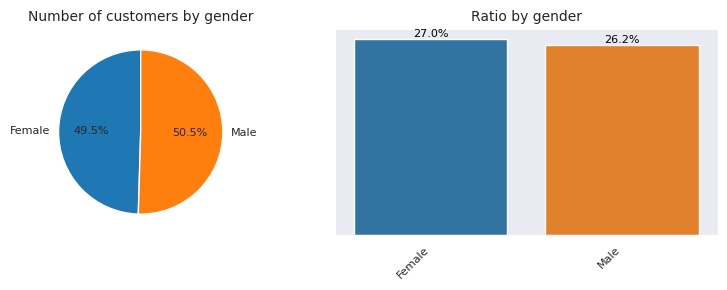

In [ ]:
cust_ratio('gender')

Both male and female have almost equal ratio (50%) and same target rate (26%)

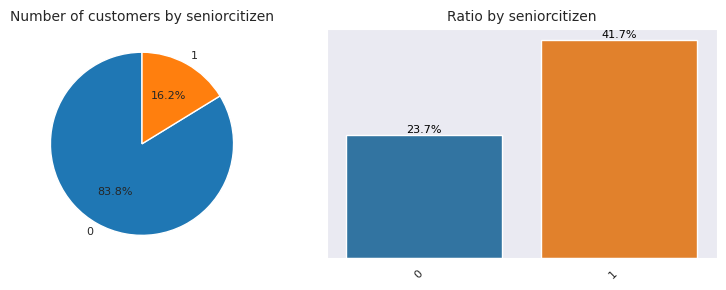

In [ ]:
cust_ratio('seniorcitizen')

16% of the customers are senior citizens but they have higher target rate (42%) than those who are not Senior Citizen.

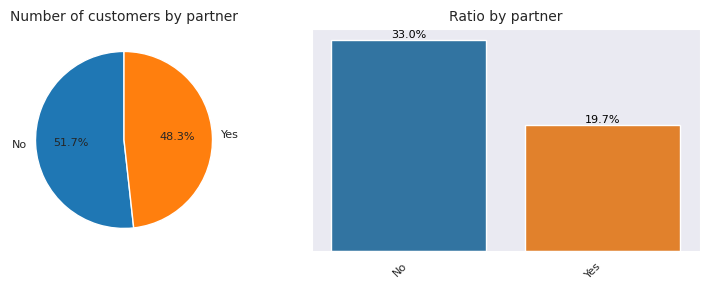

In [ ]:
cust_ratio('partner')

 About 50% of the customers have a partner and they have lower target rate (20%) than those who do not have.




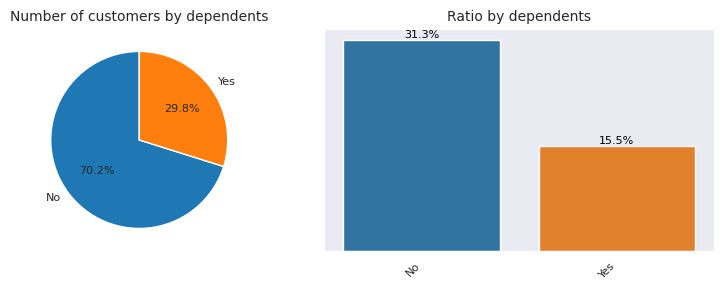

In [ ]:
cust_ratio('dependents')

 About 29% of the customers have a partner and they have lower target rate (16%) than those who do not have.

Account Info: tenure , contract , paperless billing , payment method , monthly charges , total charges

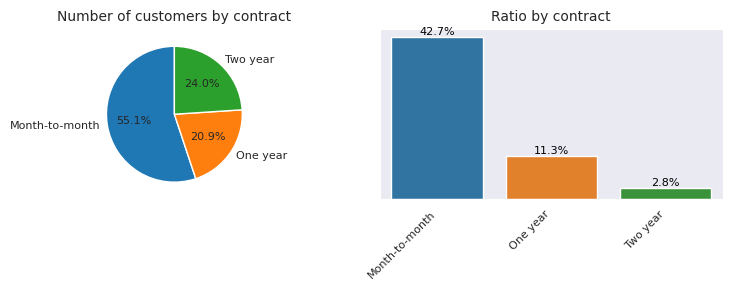

In [ ]:
cust_ratio('contract')

Customers who sign a month to month contract account are the most (55%) and they have highest target rate(43%).\
Customers who sign shorter contract have higher churn rate.

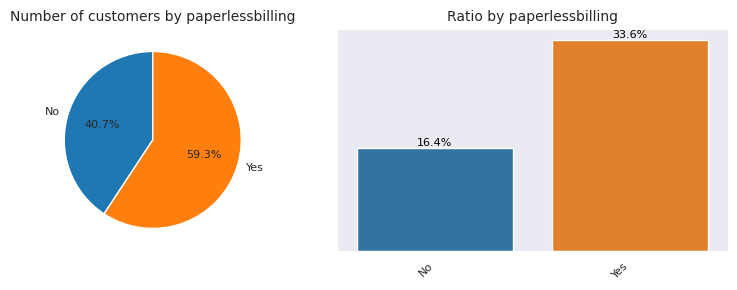

In [ ]:
cust_ratio('paperlessbilling')

Customers who have paperless billing are the most (60%) and they have highest target rate(34%).


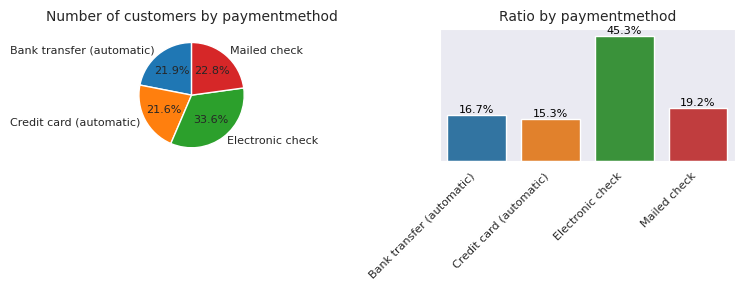

In [ ]:
cust_ratio('paymentmethod')

Customers who pay with electronic check are the most (34%), followed by mailed check and 2 others. They have highest target rate(45%) while other customers only have target rate below 20%.

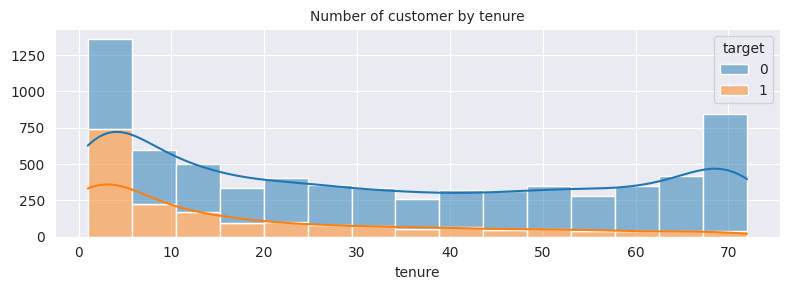

In [ ]:
plt.figure(figsize=(8, 3), facecolor='white')
sns.set_style('darkgrid')
sns.histplot(data=df, x='tenure', hue='target', multiple='stack', kde=True)
plt.ylabel('')
plt.title(f"Number of customer by tenure", fontsize=10)

plt.tight_layout()
plt.show()

A lot of customers have been with the company for just 1-2 month and above 70 months.\
Other ranges exhibit an quite equal distribution of customers.\
Customers who have been with the company for longer time are likely to have lower target rate.

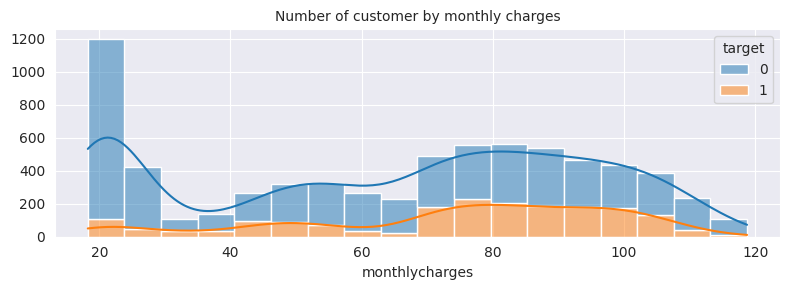

In [ ]:
plt.figure(figsize=(8, 3), facecolor='white')
sns.set_style('darkgrid')
sns.histplot(data=df, x='monthlycharges', hue='target', multiple='stack', kde=True)
plt.ylabel('')
plt.title(f"Number of customer by monthly charges", fontsize=10)

plt.tight_layout()
plt.show()

A lot of customers pay monthly charges at around 20-25.\
A few customer pay monthly charges at 30-40 and 115-120.\
Most of customer pay monthly charge within range 70-110

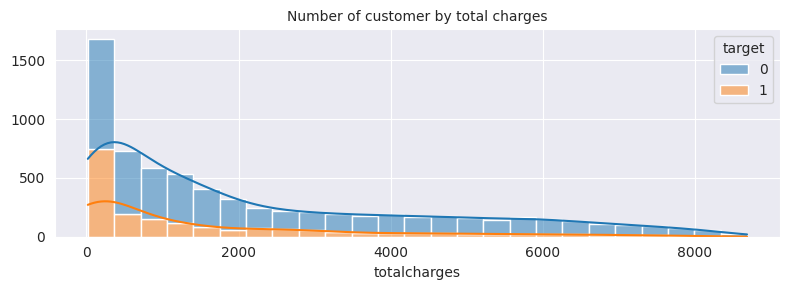

In [ ]:
plt.figure(figsize=(8, 3), facecolor='white')
sns.set_style('darkgrid')
sns.histplot(data=df, x='totalcharges', hue='target', multiple='stack', kde=True)
plt.ylabel('')
plt.title(f"Number of customer by total charges", fontsize=10)

plt.tight_layout()
plt.show()

A lot of customers pay total charge at around 400.\
Number of customers decreases as the total charges paid increase.\
Customer with lesser pay are likely to have higher target rate.

Service Used: phone service , multiple lines , Internet service , online security , online backup , device protection , tech support , streaming TV , streaming movies

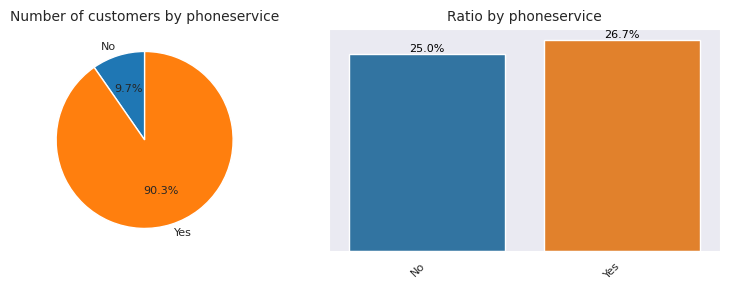

In [ ]:
cust_ratio('phoneservice')

90% of the customers have phone service.\
There is almost no difference in target rate between customers who have phone service and customers who have no. Both they have target rate at around 26%

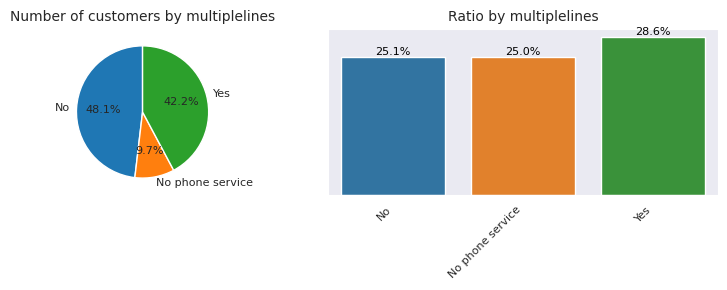

In [ ]:
cust_ratio('multiplelines')

42% of the customers have multple lines.\
They have a bit higher target rate (29%) than those who do not (25%)

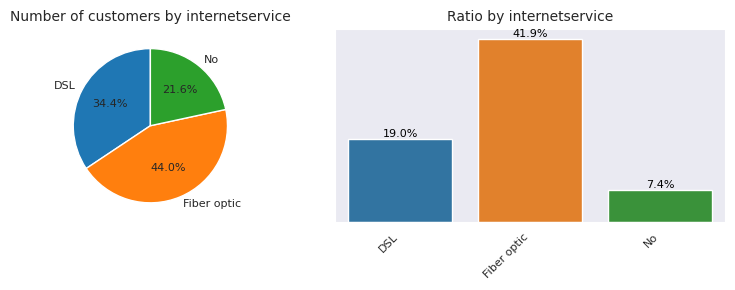

In [ ]:
cust_ratio('internetservice')

Nearly 79% of the customers use internet service. Among them, 44% of the customers use Fiber optic, 35% of the customers use DSL \
Customers who use Fiber optic also have a lot higher target rate (42%) than those who use DSL (19%) and those who do not

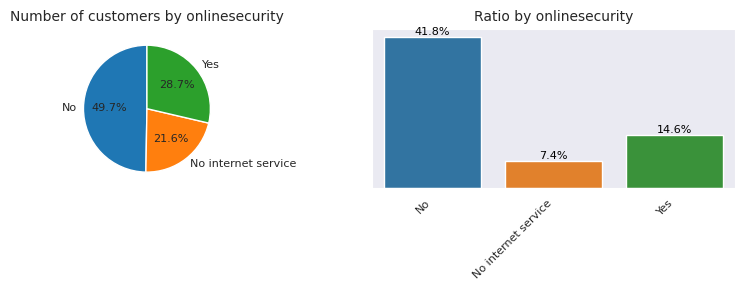

In [ ]:
cust_ratio('onlinesecurity')

Only 29% of the customers use online security and they have a lot lower target rate (15%) than those who do not.

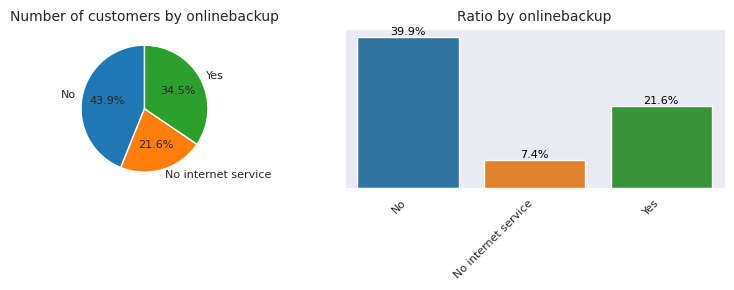

In [ ]:
cust_ratio('onlinebackup')

Around 35% of the customers use online backup and they have lower target rate (22%) than those who do not.

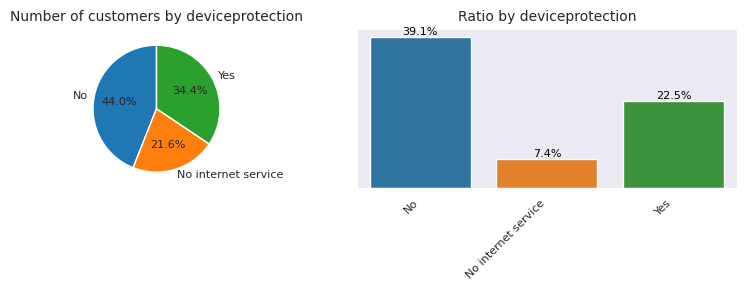

In [ ]:
cust_ratio('deviceprotection')

Around 35% of the customers use divice protection and they have lower target rate (23%) than those who do not.

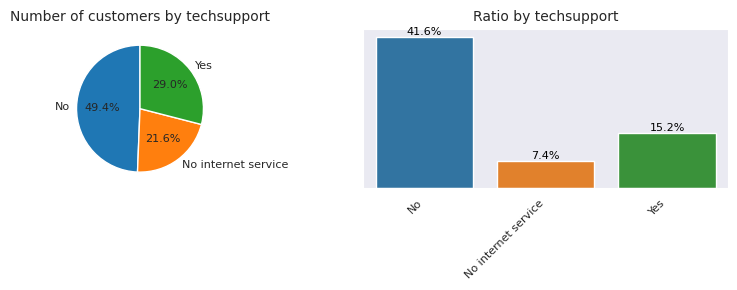

In [ ]:
cust_ratio('techsupport')

Only 29% of the customers use tech support and they have a lot lower target rate (15%) than those who do not.

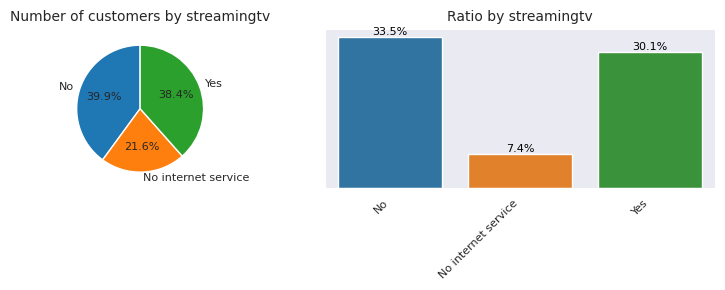

In [ ]:
cust_ratio('streamingtv')

Around 38% of the customers use stream TV.\
There is almost no difference in target rate between customers who use stream TV and customers who do not

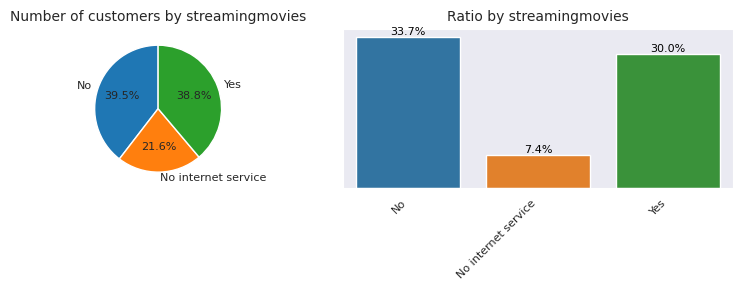

In [ ]:
cust_ratio('streamingmovies')

Around 38% of the customers use stream Movies.\
There is almost no difference in target rate between customers who use stream Movies and customers who do not

<ipython-input-62-faa6a1d0adde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.drop('target', axis=1).corr()


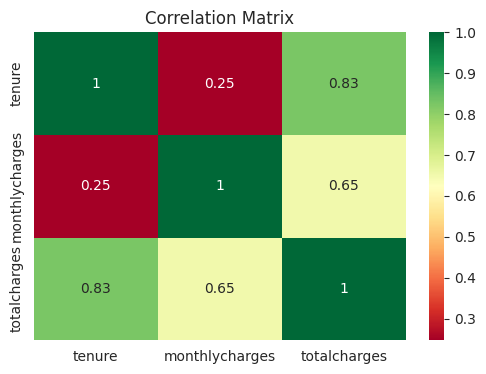

In [ ]:
plt.figure(figsize=(6,4), facecolor='white')
df_corr = df.drop('target', axis=1).corr()
sns.heatmap(df_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

There is very high correlation between tenure and total charges.\
That makes sense because the longer customers stay, the more customer pay total charges. Thus, consider removing total charges and keeping tenure as a representative feature into model later

##2. Feature engineering and selection

Firstly, let's encode these features into 2 groups:


*   Label encoding:  gender, seniorcitizen, partner, dependents, phoneservice, paperlessbilling
*   One hot encoding: multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paymentmethod



In [ ]:
numeric_fts = [i for i in df.select_dtypes(include='number').columns.tolist() if i != 'target']

In [ ]:
numeric_fts

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
# label encoding
label_mapping = {
  'gender': {
      'Male': 1,
      'Female': 0
  },
  'seniorcitizen': {
      1: 1,
      0: 0
  },
  'partner': {
      'Yes': 1,
      'No': 0
  },
  'dependents': {
      'Yes': 1,
      'No': 0
  },
  'phoneservice': {
      'Yes': 1,
      'No': 0
  },
  'paperlessbilling': {
      'Yes': 1,
      'No': 0
  }
}

label_col = [i for i in df.iloc[:,0:-1].columns if df[i].nunique() == 2]
for col in label_col:
    if col in label_mapping:
      df[col] = df[col].map(label_mapping[col])

In [ ]:
# one hot encoding
onehot_label = [i for i in df.iloc[:,1:].select_dtypes(include='object').columns]
one_hot_df = pd.get_dummies(df[onehot_label])

In [ ]:
df_model = pd.merge(df[['target'] + numeric_fts + label_col], one_hot_df, left_index=True, right_index=True)
df_model.head()

,target,tenure,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,phoneservice,paperlessbilling,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,"1,889.50",1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,2,53.85,108.15,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,"1,840.75",1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1,2,70.70,151.65,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df_model.columns = [re.sub('[.\s]+', '_', c.lower().replace('(', '').replace(')', '')) for c in df_model.columns]

These features *onlinesecurity_no_internet_service, onlinebackup_no_internet_service, deviceprotection_no_internet_service, techsupport_no_internet_service, streamingtv_no_internet_service, streamingmovies_no_internet_service have same meaning* with *internetservice_no* so remove them.\
Additional, *tenure, totalcharges* have a strong relationship, so keep *tenure* feature.

In [ ]:
remove_fts = [i for i in df_model.columns if 'no_internet_service' in i] + ['totalcharges']

In [ ]:
df_model = df_model[[i for i in df_model.columns if i not in remove_fts]]

In [ ]:
# Scaling numeric feature
from sklearn.preprocessing import MinMaxScaler
selected_columns = df_model[['tenure','monthlycharges']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(selected_columns)
df_model[['tenure','monthlycharges']] = scaled_data
df_model[['tenure','monthlycharges']]

,tenure,monthlycharges
0,0.00,0.12
1,0.46,0.39
2,0.01,0.35
3,0.62,0.24
4,0.01,0.52
...,...,...
7038,0.32,0.66
7039,1.00,0.85
7040,0.14,0.11
7041,0.04,0.56


In [ ]:
df_model.shape

(7032, 34)

Since the target variable is categorical, using a correlation matrix with a heatmap does not provide meaningful insights. Out of the 33 features, 31 are categorical variables. Therefore, it makes more sense to employ statistical tests like SelectKBest based on the Chi-Square test to evaluate the importance of features with respect to the target variable

In [ ]:
x= df_model.iloc[:,1:]
y= df_model.iloc[:,0]

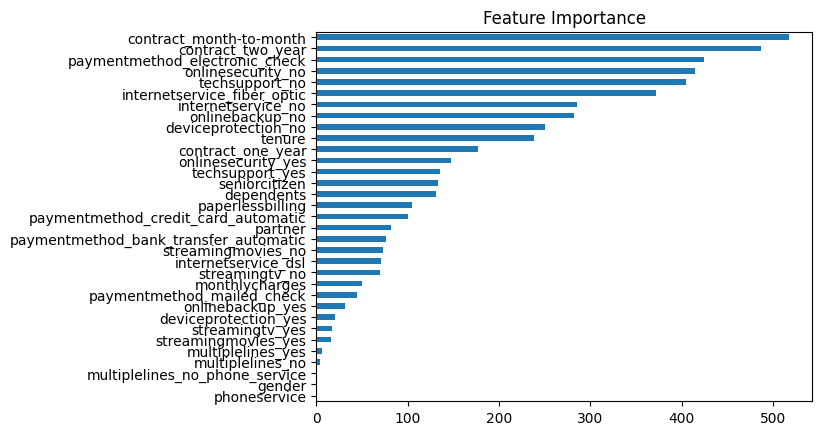

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2)
model_fts = bestfeatures.fit(x,y)
feature_importances = pd.Series(model_fts.scores_, index = x.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [ ]:
# List out 20 the most important features
sorted_idx = feature_importances.argsort()[::-1]
list_important_fts_1 = np.array(x.columns)[sorted_idx][:20]
list_important_fts_1

array(['contract_month-to-month', 'contract_two_year',
       'paymentmethod_electronic_check', 'onlinesecurity_no',
       'techsupport_no', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinebackup_no', 'deviceprotection_no',
       'tenure', 'contract_one_year', 'onlinesecurity_yes',
       'techsupport_yes', 'seniorcitizen', 'dependents',
       'paperlessbilling', 'paymentmethod_credit_card_automatic',
       'partner', 'paymentmethod_bank_transfer_automatic',
       'streamingmovies_no'], dtype=object)

## 3. Model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = LogisticRegression()
x1 = x[list_important_fts_1]
X_train, X_test, y_train, y_test = train_test_split(x1, y,
                                                    random_state=29)
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.8031854379977247
model score on testing data: 0.800910125142207


In [ ]:
def eval_class(true, predicted):
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    log_loss = metrics.log_loss(true, predicted)
    auc = metrics.roc_auc_score(true, predicted)

    print(f'Model accuracy: {acc:.4f}')
    print(f'Model precision: {precision:.4f}')
    print(f'Model recall: {recall:.4f}')
    print(f'Model F1 score: {f1:.4f}')
    print(f'Model log loss: {log_loss:.4f}')
    print(f'Model AUC: {auc:.4f}')

In [ ]:
from sklearn import metrics
predicted_labels = model.predict(X_test)
eval_class(y_test, predicted_labels)

Model accuracy: 0.8009
Model precision: 0.6427
Model recall: 0.5274
Model F1 score: 0.5793
Model log loss: 7.1759
Model AUC: 0.7122


This model classified to the right class at about 80%.\
This model correctly predicted around 64% of actual target customer in total predicted target customer.\
This model correctly identified nearly 53% of actual target customer


---


